<a href="https://colab.research.google.com/github/EmmanueleVilla/QuantumComputing/blob/main/Hello%2C%20Quantum%20World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit --quiet

     |████████████████████████████████| 6.7 MB 4.5 MB/s 
     |████████████████████████████████| 18.0 MB 216 kB/s 
     |████████████████████████████████| 240 kB 42.6 MB/s 
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 112 kB 50.0 MB/s 
     |████████████████████████████████| 1.6 MB 52.3 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 37.5 MB 42 kB/s 
     |████████████████████████████████| 943 kB 54.0 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 4.0 MB 37.8 MB/s 
     |████████████████████████████████| 112 kB 49.9 MB/s 


In [2]:
!pip install pylatexenc --quiet

     |████████████████████████████████| 162 kB 4.2 MB/s 


In [21]:
import qiskit as qk
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
import qiskit.tools.jupyter
%matplotlib inline
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [24]:
quantum_simulator = qk.Aer.get_backend('qasm_simulator')
state_vector_simulator = qk.Aer.get_backend('statevector_simulator')

## Circuit number one: two qubits, two bits, no gates



In [26]:
circuit = qk.QuantumCircuit(2, 2)

# Execute state vector simulation
job = qk.execute(circuit, backend=state_vector_simulator)
result = job.result()
state_vector = result.get_statevector()

# Add qubit-to-bit mapping
circuit.measure([0, 1], [0, 1])

# Execute circuit
job = qk.execute(circuit, backend=quantum_simulator, shots=1024).result()
counts = job.get_counts()

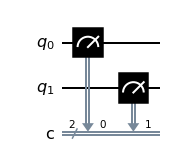

In [27]:
# Draw the circuit
circuit.draw(output="mpl")

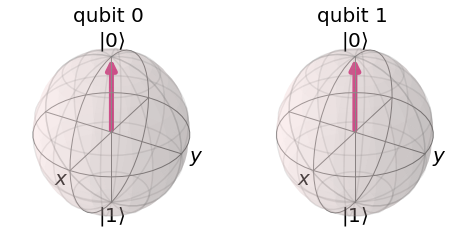

In [28]:
# Plot state vector
plot_bloch_multivector(state_vector)

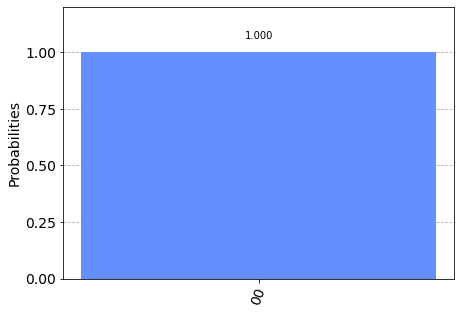

In [29]:
# Plot result
plot_histogram(counts)

## Circuit number two: two qubits, two bits, one Hadamard Gate

In [32]:
circuit = qk.QuantumCircuit(2, 2)
circuit.h(0) # Add an hadamard gate to put the qubit 0 into a superposition
circuit.barrier()

# Execute state vector simulation
job = qk.execute(circuit, backend=state_vector_simulator)
result = job.result()
state_vector = result.get_statevector()

# Add qubit-to-bit mapping
circuit.measure([0, 1], [0, 1])

# Execute circuit
job = qk.execute(circuit, backend=quantum_simulator, shots=1024).result()
counts = job.get_counts()

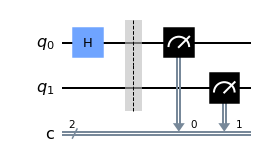

In [33]:
# Draw the circuit
circuit.draw(output="mpl")

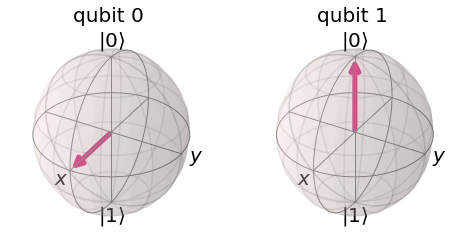

In [34]:
# Plot state vector
plot_bloch_multivector(state_vector)

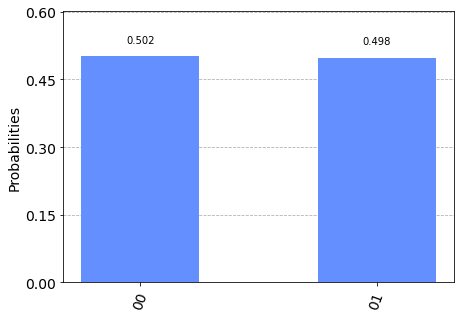

In [35]:
# Plot result
plot_histogram(counts)

## Circuit number three: two qubits, two bits, one Hadamard Gate, one Z Gate

In [45]:
circuit = qk.QuantumCircuit(2, 2)
circuit.h(0) # Add an hadamard gate to put the qubit 0 into a superposition
circuit.z(0) # Add a Z gate to rotate around the Z axis by pi
circuit.barrier()

# Execute state vector simulation
job = qk.execute(circuit, backend=state_vector_simulator)
result = job.result()
state_vector = result.get_statevector()

# Add qubit-to-bit mapping
circuit.measure([0, 1], [0, 1])

# Execute circuit
job = qk.execute(circuit, backend=quantum_simulator, shots=1024).result()
counts = job.get_counts()

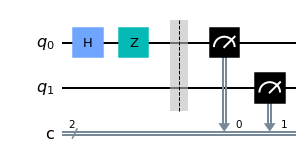

In [37]:
# Draw the circuit
circuit.draw(output="mpl")

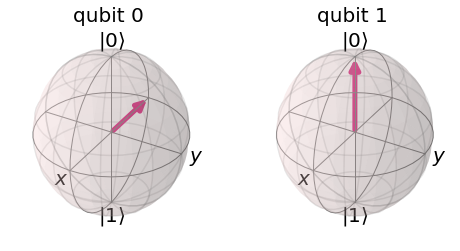

In [38]:
# Plot state vector
plot_bloch_multivector(state_vector)

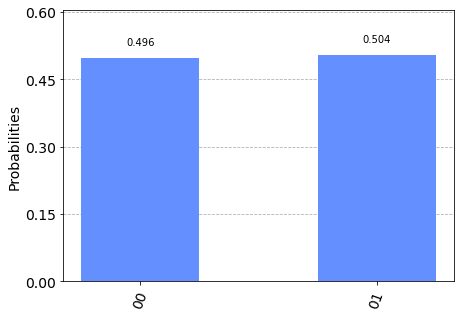

In [39]:
# Plot result
plot_histogram(counts)

## Circuit number four: two qubits, two bits, one Hadamard Gate, one Z Gate, one CNot Gate

In [47]:
circuit = qk.QuantumCircuit(2, 2)
circuit.h(0) # Add an hadamard gate to put the qubit 0 into a superposition
circuit.z(0) # Add a Z gate to rotate around the Z axis by pi
circuit.cx(0, 1) # Add a Controlled Not gate that links the 0 and the 1 qubit.
                 # If qubit 0 is 0, do nothing -> result is 00
                 # If qubit 0 is 1, invert qubit 1 -> result is 11
                 # This creates an entanglement!
circuit.barrier()

# Execute state vector simulation
job = qk.execute(circuit, backend=state_vector_simulator)
result = job.result()
state_vector = result.get_statevector()

# Add qubit-to-bit mapping
circuit.measure([0, 1], [0, 1])

# Execute circuit
job = qk.execute(circuit, backend=quantum_simulator, shots=1024).result()
counts = job.get_counts()

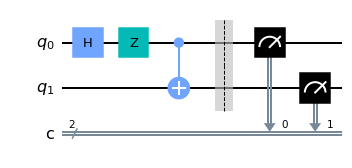

In [41]:
# Draw the circuit
circuit.draw(output="mpl")

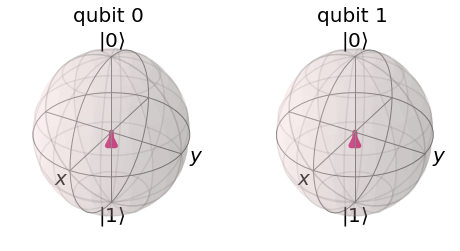

In [42]:
# Plot state vector
plot_bloch_multivector(state_vector)

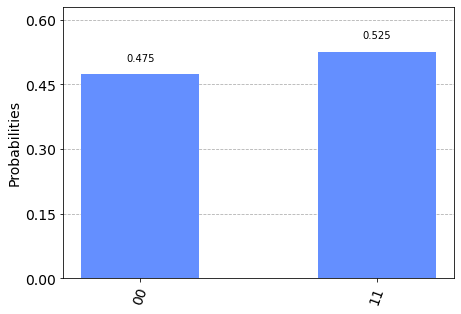

In [43]:
# Plot result
plot_histogram(counts)

#### Plot from an actual quantum computer:

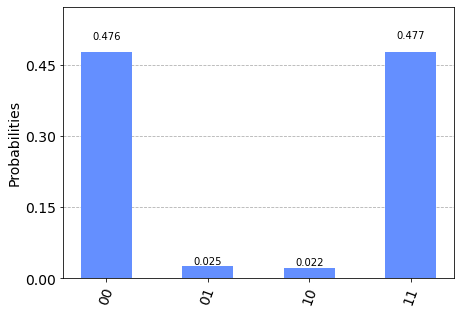